# Trees

## Decision Trees

A decision tree is a decision support tool that uses a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements.

https://en.wikipedia.org/wiki/Decision_tree

                                     Do I Need an Umbrella Today?
                                         Is it cloudy today?
                                            (Root Node)
                                                /\
                                           yes /  \ no
                                              /    \
                                         chance    no umbrella
                                        of rain?      
                                            /\
                                       yes /  \ no
                                          /    \
                                yes umbrella   no umbrella
                                   

### Decision Tree Terms

* Root Node: Represents our population from which two or more subsets are divided up
* Decision Node: Sub-nodes divided into more sub-nodes based on a decision
* Splitting: dividing a node into sub-nodes
* Leaf / Terminal Node: Node with no children or sub-nodes
* Branch: A section of a decision tree
* Pruning: Eliminating branches and nodes
* Parent / Children: The relationship between nodes and their sub-nodes

## Visualizing Some Data

(120, 4)
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
22                4.6               3.6                1.0               0.2
15                5.7               4.4                1.5               0.4
65                6.7               3.1                4.4               1.4
11                4.8               3.4                1.6               0.2
42                4.4               3.2                1.3               0.2


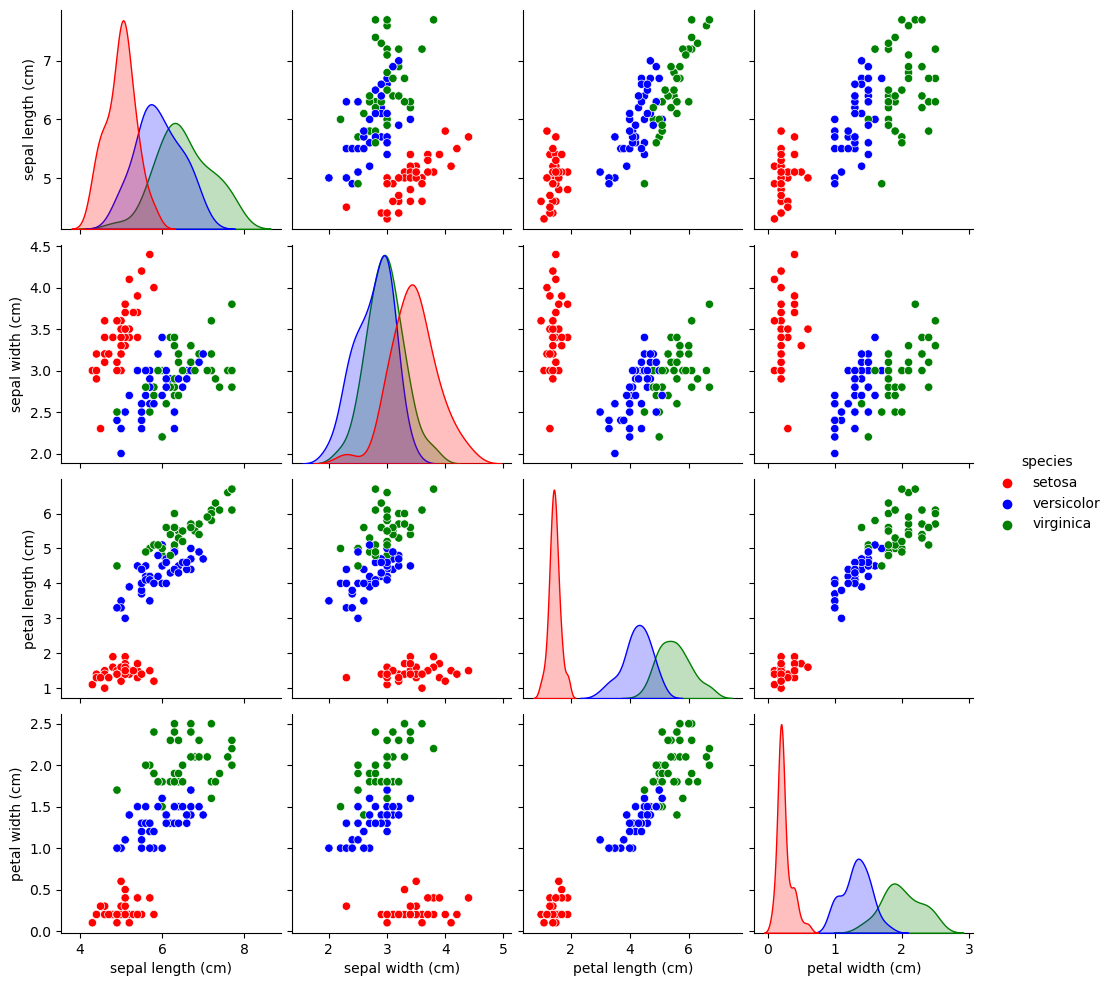

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris.data
y = iris.target

df = pd.DataFrame(data=X, columns=iris.feature_names)
df['species'] = y
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})


X_train, X_test, y_train, y_test = train_test_split(df.drop('species', axis=1),
                                                    df['species'],
                                                    test_size=0.20,
                                                    random_state=42)

print(X_train.shape)
print(X_train.head())

example = X_train.copy()
example['species'] = y_train

sns.pairplot(example, hue='species', palette=['red', 'blue', 'green']);

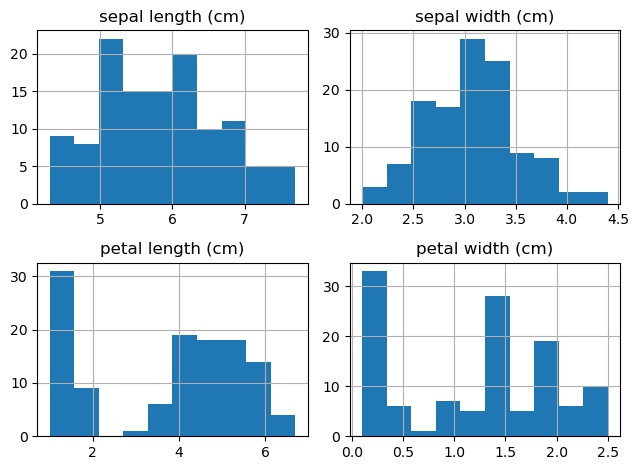

In [ ]:
import matplotlib.pyplot as plt

X_train.hist()
plt.tight_layout();

    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
22                4.6               3.6                1.0               0.2
15                5.7               4.4                1.5               0.4
65                6.7               3.1                4.4               1.4
11                4.8               3.4                1.6               0.2
42                4.4               3.2                1.3               0.2
versicolor    41
setosa        40
virginica     39
Name: species, dtype: int64


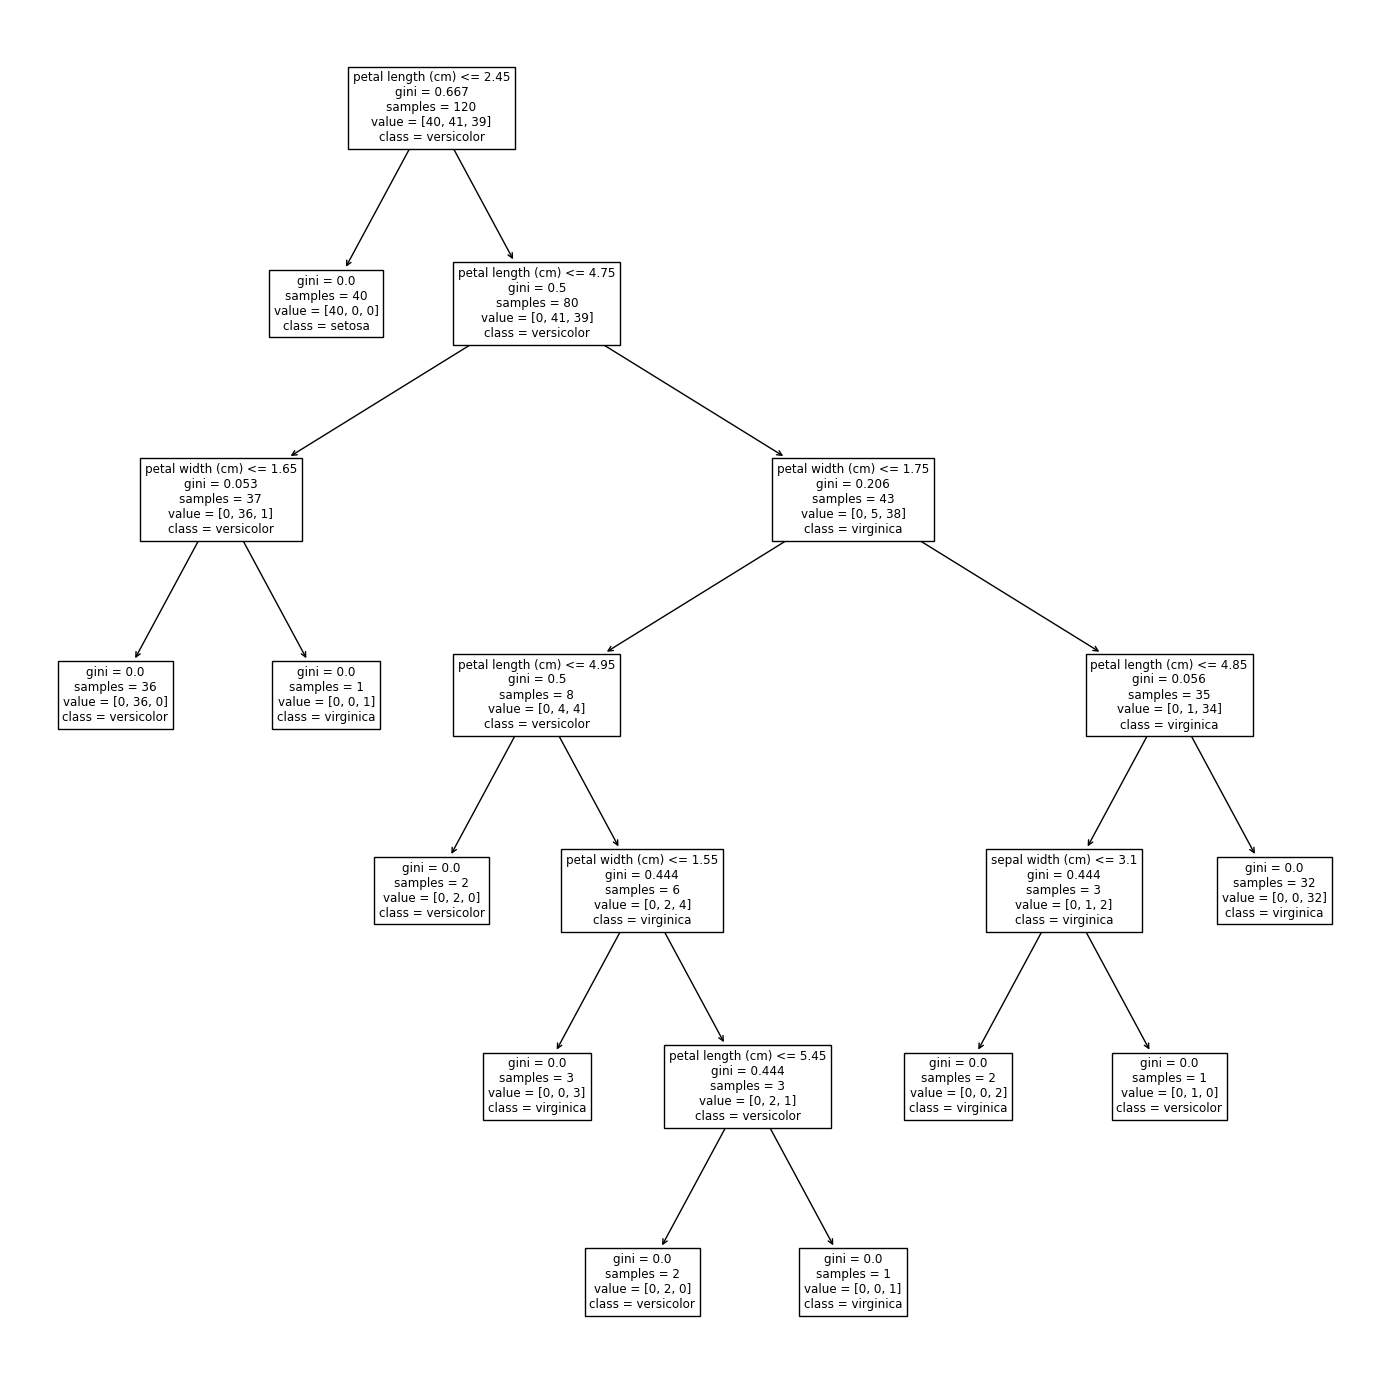

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split

print(X_train.head())
print(y_train.value_counts())

model = DecisionTreeClassifier(criterion='gini', random_state=42).fit(X_train, y_train)

plt.figure(figsize=(14, 14))
tree.plot_tree(model,
              feature_names=X_train.columns,
              class_names=['setosa', 'versicolor', 'virginica'],
              filled=False)

plt.tight_layout();

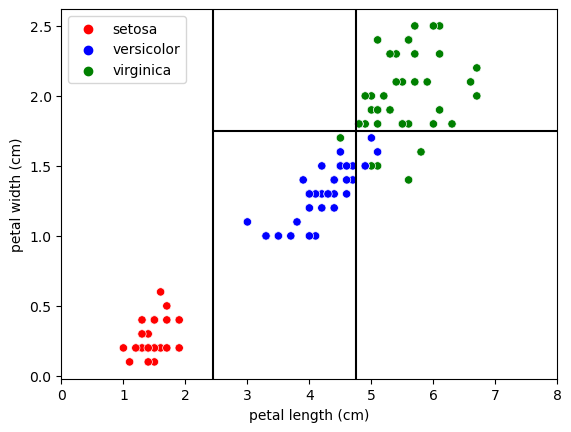

In [ ]:
# plot using hue to show different classes
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x=example['petal length (cm)'],
                y=example['petal width (cm)'],
                hue=example['species'],
                palette=['red', 'blue', 'green'])
plt.axvline(x=2.45, color='black')
plt.axvline(x=4.75, color='black')
plt.hlines(y=1.75, xmin=2.45, xmax=8, color='black')

plt.xlim(0, 8)
plt.legend()
plt.show()

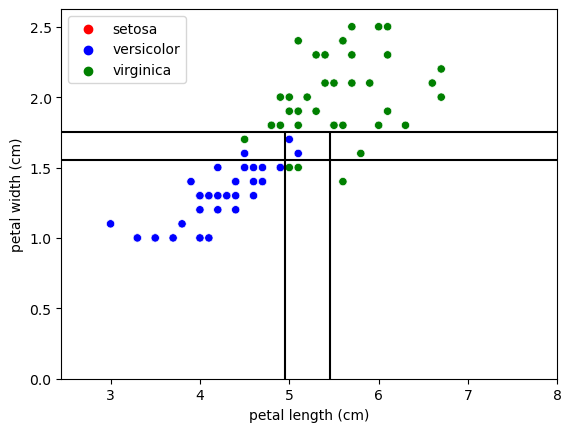

In [ ]:
# plot using hue to show different classes
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x=example['petal length (cm)'][example['petal length (cm)']>2.45],
                y=example['petal width (cm)'],
                hue=example['species'],
                palette=['red', 'blue', 'green'])
plt.axhline(y=1.75, color='black')
plt.vlines(x=4.95, ymin=0, ymax=1.75, color='black')
plt.vlines(x=5.45, ymin=0, ymax=1.75, color='black')
plt.axhline(y=1.55, color='black')

plt.xlim(2.45, 8)
plt.ylim(0, )
plt.legend()
plt.show()

## Methods Used to Split the Tree

The idea behind building trees is, finding the best feature to split on that generates the largest information gain or provides the least uncertainity in the following leafs.

https://www.kaggle.com/code/ma7555/decision-trees-information-gain-from-scratch

Information gain is a decrease in entropy. Decision trees make use of information gain and entropy to determine which feature to split into nodes to get closer to predicting the target and also to determine when to stop splitting.

https://www.askpython.com/python/examples/decision-trees

https://www.analyticsvidhya.com/blog/2020/06/4-ways-split-decision-tree/

* Reduction in Variance
* Gini Impurity
* Entropy
* Information Gain
* Chi Square

## Gini

* Probability of a specific feature that is classified incorrectly when selected randomly
* The more diverse the higher the gini impurity index
* Gini index = probability of picking two distinct elements
* Gini = 0, purity of classification
* Gini = 1, random distribution
* Gini = .5, equal distribution of elements
* Favors larger partitions and easy to implement

## Gini Impurity

1 - Gini

## Gini Formula

### $\sum{p_i^2}$

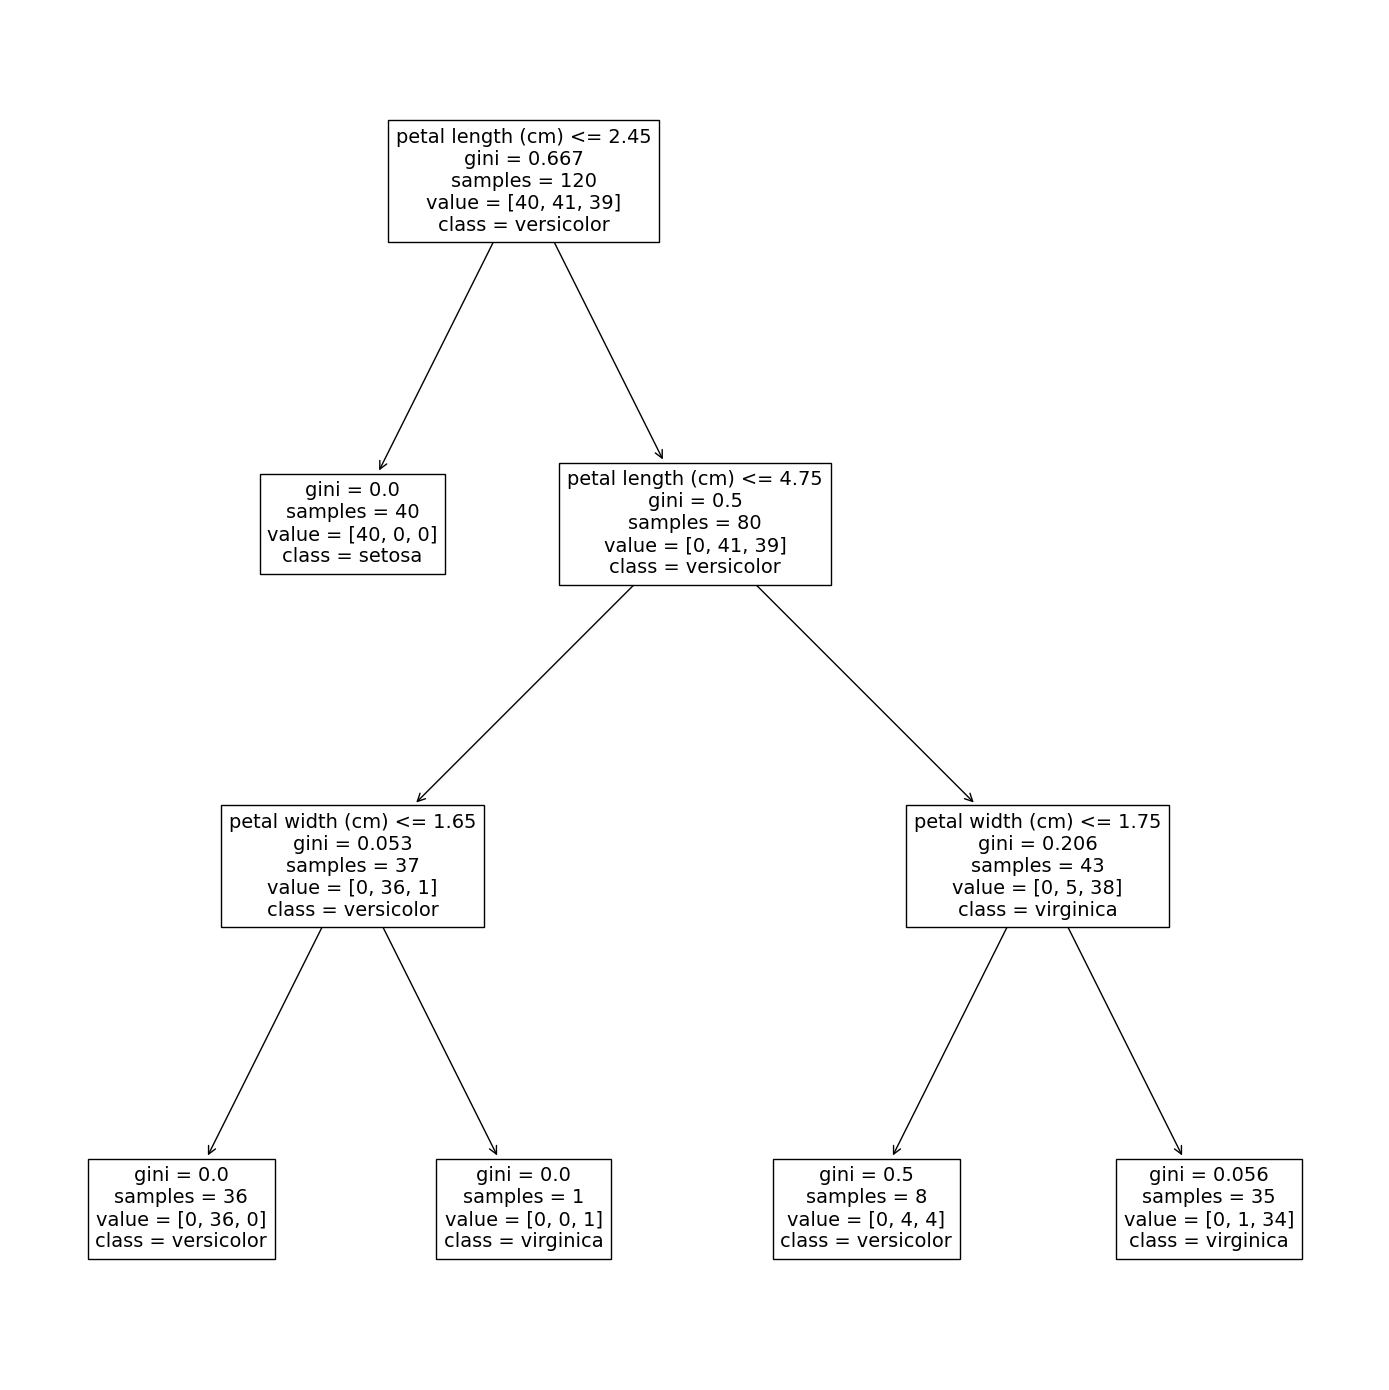

In [ ]:
model = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42).fit(X_train, y_train)

plt.figure(figsize=(14, 14))
tree.plot_tree(model,
              feature_names=X_train.columns,
              class_names=['setosa', 'versicolor', 'virginica'],
              filled=False)

plt.tight_layout();

## Entropy

* Measures uncertainty in a dataset
* Measures disorder
* Count the number of unique labels in a feature
* $entropy= -p_1log(p_1)-p_2log(p_2)...$
* $p_i$ = 1, all members have property i
* $p_i$ = 0, no members have property i
* For two classes q = 1 - p
* q = 0, one class is dominant, set has minimal disorder (it is pure) and the entropy is zero
* q = p = 0.5, set is balanced and entropy is 1
* q = 1, other class is dominant and entropy is back to zero

https://book.akij.net/eBooks/2018/May/5aef50939a868/Data_Science_for_Bus.pdf (page 51 - 52)

## Entropy Formula

### $-\sum{p(x)log_2p(x)}$

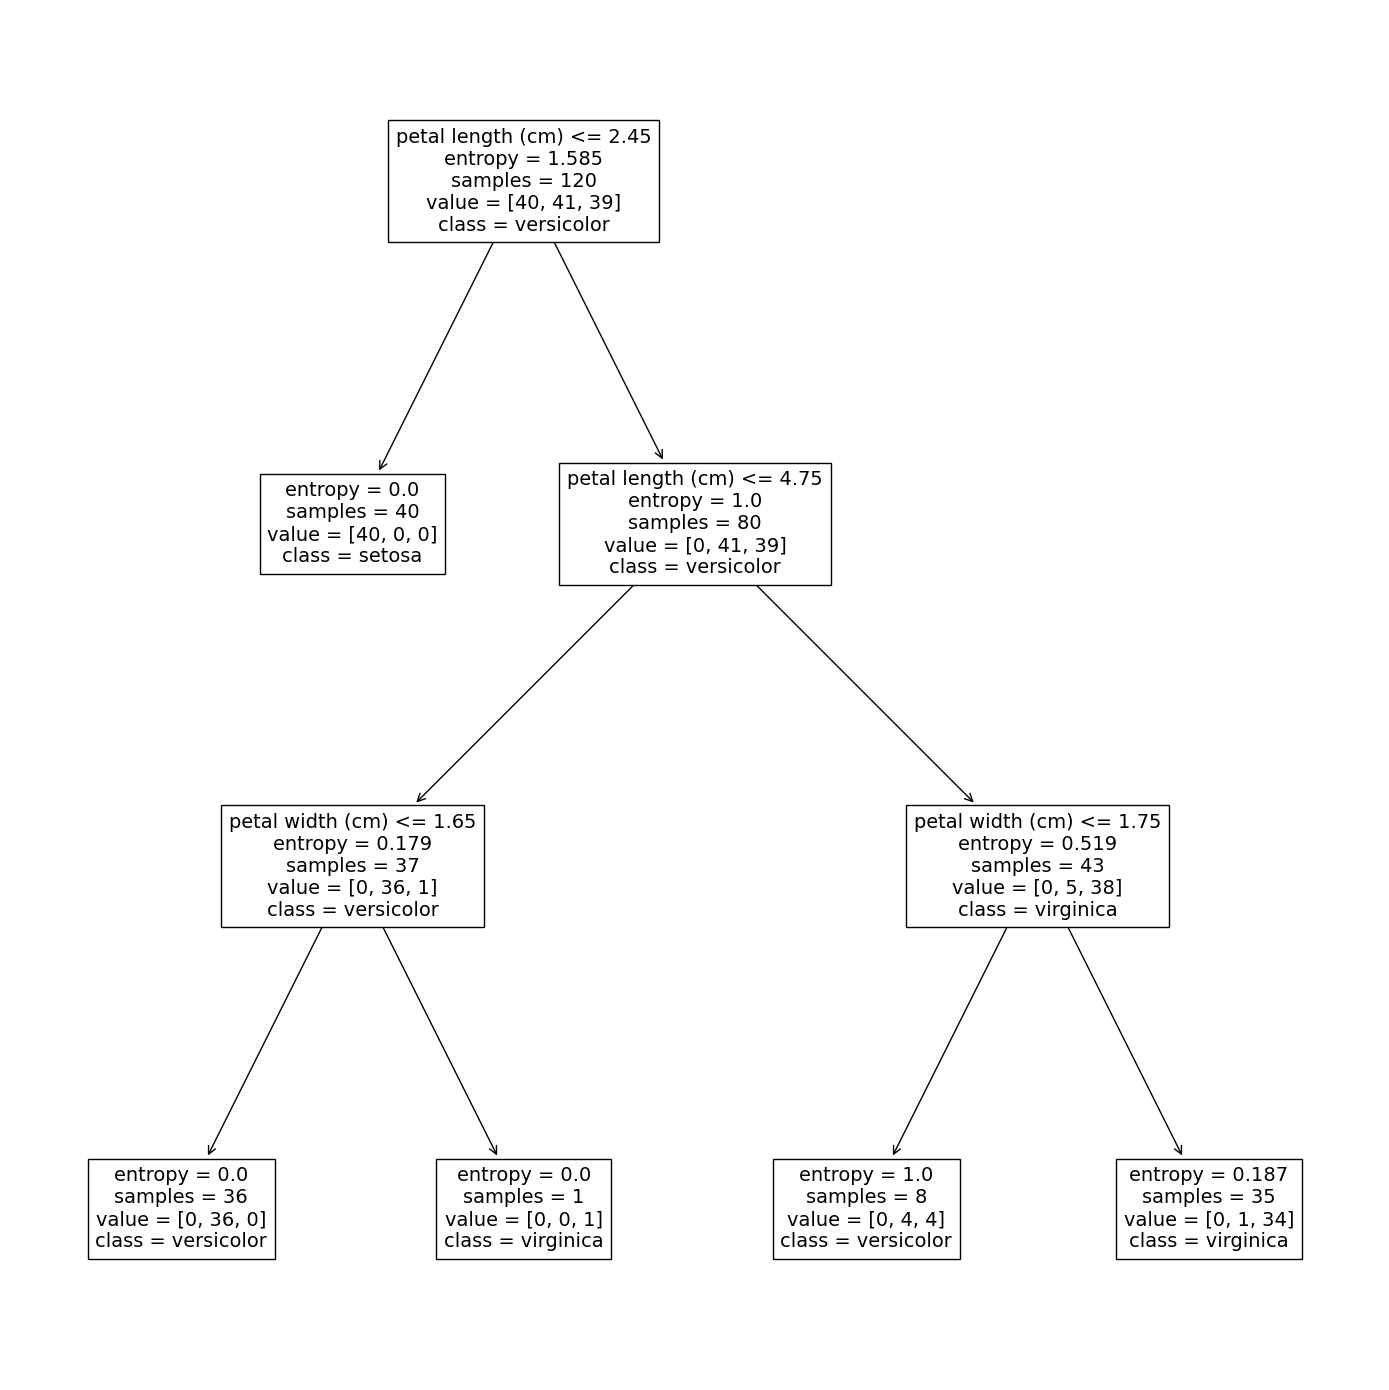

In [ ]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42).fit(X_train, y_train)

plt.figure(figsize=(14, 14))
tree.plot_tree(model,
              feature_names=X_train.columns,
              class_names=['setosa', 'versicolor', 'virginica'],
              filled=False)

plt.tight_layout();

## Information Gain

### See Information Gain Calculation Notebook

We can define information gain as a measure of how much information a feature provides about a class. Information gain helps to determine the order of attributes in the nodes of a decision tree.

https://www.section.io/engineering-education/entropy-information-gain-machine-learning/

Information Gain = 1 - Entropy

* Measures how much information X provides for y
* Binary measure, either 1 or 0
* 1 for full bit of information
* 0 for no information
* Entropy is also information
* Our entropy example for the `target (inflated)` shows less than a bit of information because there are more Fs than Ts
* If we predict F we have a 9 out of 15 chance of being right

We can also think of entropy as information. Suppose we have a loaded six-sided die which always lands on (3). Each time we roll the die, we know upfront that the result will be (3). We gain no new information by rolling the die, so entropy is 0. On the other hand, if the die is fair and we roll a (3) there is a 1/6 chance in rolling the (3). Now we have gained information. Thus, rolling the die gives us one bit of information — which side the number landed on.

https://towardsdatascience.com/entropy-and-information-gain-in-decision-trees-c7db67a3a293

### Gain Ratio

* Makes decision on what to split first
* https://www.kdnuggets.com/2020/01/decision-tree-algorithm-explained.html

* Keep on splitting till our target value, inflated, is no longer mixed or pure
* We want splits that lower the entropy of our target column

### $IG(Y,X) = Entropy{(Y)}-Entropy{(Y|X)}$

How much information is gained about y, when we learn about y given X, a particular feature

* where y = Target (inflated)
* and y|X is class of y given the feature

## Gini vs Entropy?

* https://www.kdnuggets.com/2020/01/decision-tree-algorithm-explained.html
* The Gini Impurity favours bigger partitions (distributions) and is simple to implement, whereas information gains favour smaller partitions (distributions) with a variety of diverse values, necessitating a data and splitting criterion experiment
* https://analyticsindiamag.com/gini-impurity-vs-information-gain-vs-chi-square-methods-for-decision-tree-split/
* Gini Index has values inside the interval (0, 0.5) whereas the interval of the Entropy is (0, 1). In the following figure, both of them are represented. The gini index has also been represented multiplied by two to see concretely the differences between them, which are not very significant.
* https://quantdare.com/decision-trees-gini-vs-entropy/